# Importando as bibliotecas

In [1]:
import pandas as pd
from scipy.special import comb
from scipy.stats import binom, poisson, norm, t as t_student, chi, wilcoxon
import numpy as np

# 1.1 Distribuição binomial

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

### Problema 1

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

Os ensaios são independentes, e há apenas duas possibilidades em cada ensaio, acerto ou erro.

#### Probabilidade de sucesso (p)

In [2]:
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

#### Probabilidade de fracasso (q)

In [3]:
q = 1 - p
q

0.6666666666666667

#### Total de evento que se deseja ter sucesso (k)

In [4]:
k = 5
k

5

#### Número de ensaios (n)

In [5]:
n = 10
n

10

### Solução 1

In [6]:
probabilidade = (comb(n, k)) * (p ** k) * (q ** (n - k))
print(f'{probabilidade:.8f}')

0.13656455


### Solução 2

In [7]:
probabilidade = binom.pmf(k, n, p)
print(f'{probabilidade:.8f}')

0.13656455


### Probabilidade do candidato ser aprovado

In [8]:
binom.sf(4, n, p)

0.21312808006909525

### Problema 2

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

#### Probabilidade de sucesso (p)

In [9]:
p = 0.6
p

0.6

#### Número de ensaios (n)

In [10]:
n = 12
n

12

#### Total de evento que se deseja ter sucesso (k)

In [11]:
k = 8
k

8

In [12]:
probabilidade = binom.pmf(k, n, p)
equipes = 30 * probabilidade
print(f'{int(equipes.round())} equipes deverão ser formadas por 8 mulheres.')

6 equipes deverão ser formadas por 8 mulheres.


# 1.2 Distribuição Poisson

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

### Problema 3

Um restaurante recebe em média 20 pedidos por hora. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

#### Qual o número médio de ocorrências por hora ($\mu$)?

In [13]:
media = 20
media

20

#### Qual o número de ocorrências que queremos obter no período ( 𝑘 )?

In [14]:
k = 15
k

15

### Solução 1

In [15]:
probabilidade = ((np.e ** (-media)) * (media ** k)) / (np.math.factorial(k))
print(f'A probabilidade do restaurante receber 15 pedidos é de {probabilidade:.8f}')

A probabilidade do restaurante receber 15 pedidos é de 0.05164885


### Solução 2

In [16]:
probabilidade = poisson.pmf(k, media)
print(f'A probabilidade do restaurante receber 15 pedidos é de {probabilidade:.8f}')

A probabilidade do restaurante receber 15 pedidos é de 0.05164885


# 1.3 Distribuição normal

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

# $$Z = \frac{x-\mu}{\sigma}$$

In [17]:
tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada.head()

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879


### Problema 4

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

# A.

#### Obter a variável padronizada  𝑍

In [18]:
media = 1.7
desvio_padrao = 0.1

In [19]:
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

### Solução 1 - Tabela

In [20]:
probabilidade = 0.8413
print(f'A probabilidade de uma pessoa selecionada ter menos de 1.80 é : {probabilidade}')

A probabilidade de uma pessoa selecionada ter menos de 1.80 é : 0.8413


### Solução 2 

In [21]:
probabilidade = norm.cdf(Z)
print(f'A probabilidade de uma pessoa selecionada ter menos de 1.80 é : {probabilidade:.4f}')

A probabilidade de uma pessoa selecionada ter menos de 1.80 é : 0.8413


# B.

#### Obter a variável padronizada  𝑍

In [22]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [23]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

### Solução 1 - Tabela

In [24]:
probabilidade = (0.8413 - 0.5) * 2
print(f'A probabilidade de uma pessoa selecionada ter entre 1.60 e 1.80 é : {probabilidade:.4f}')

A probabilidade de uma pessoa selecionada ter entre 1.60 e 1.80 é : 0.6826


### Solução 2

In [25]:
probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
print(f'A probabilidade de uma pessoa selecionada ter entre 1.60 e 1.80 é : {probabilidade:.4f}')

A probabilidade de uma pessoa selecionada ter entre 1.60 e 1.80 é : 0.6827


# C.

#### Obter a variável padronizada  𝑍

In [26]:
Z = (1.9 - media) / desvio_padrao
Z

1.9999999999999996

### Solução 1 - Tabela

In [27]:
probabilidade = 1 - 0.9772
print(f'A probabilidade de uma pessoa selecionada ter mais de 1.90 é : {probabilidade:.4f}')

A probabilidade de uma pessoa selecionada ter mais de 1.90 é : 0.0228


### Solução 2

In [28]:
probabilidade = norm.sf(Z)
print(f'A probabilidade de uma pessoa selecionada ter mais de 1.90 é : {probabilidade:.4f}')

A probabilidade de uma pessoa selecionada ter mais de 1.90 é : 0.0228


# 2. Estimação

## 2.1 Teorema o limite central

In [29]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


#### Amostra aleatória com base na varíavel "Idade" do dataset

In [30]:
n = 2000
total_de_amostras = 1500
amostras = pd.DataFrame()
for i in range(total_de_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0, len(_))
    amostras['Amostra_' + str(i)] = _
    
amostras.head()

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _
C:\Users\milan\AppData\Local\Temp\ipykernel_8800\4134426821.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,47,51,52,60,37,30,38,44,51,24,...,30,59,56,52,57,25,37,37,52,44
1,46,49,49,52,47,52,61,48,49,37,...,24,47,46,61,24,64,30,52,50,23
2,19,29,46,32,48,53,30,48,63,42,...,37,62,57,41,27,47,30,30,54,29
3,34,62,24,29,39,40,33,24,33,29,...,25,59,46,65,22,28,32,48,59,34
4,65,65,54,53,43,55,24,27,58,33,...,52,35,44,40,50,61,69,43,29,33


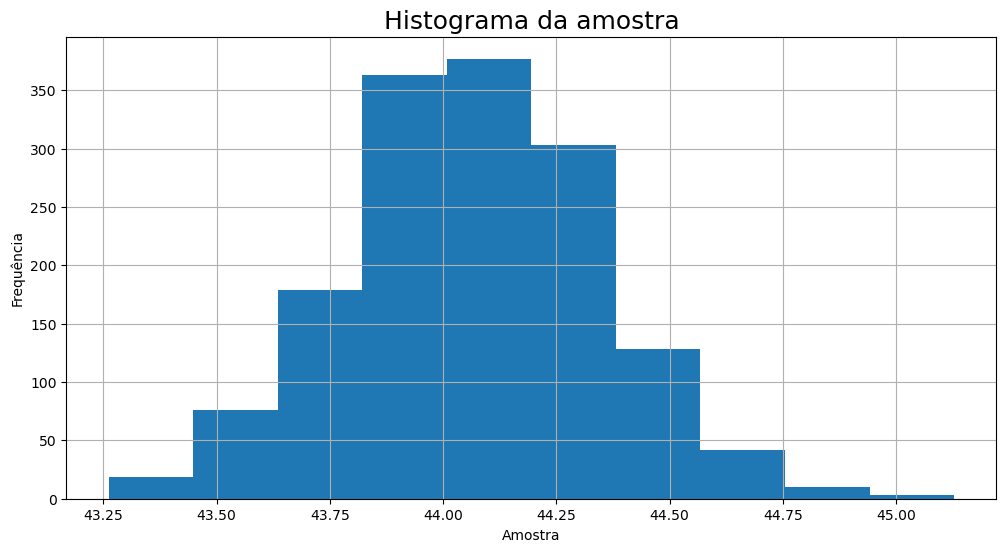

In [31]:
ax = amostras.mean().hist()
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma da amostra', fontsize=18)
ax.set_xlabel('Amostra')
ax.set_ylabel('Frequência')
ax=ax

In [32]:
print(f'A média de idade da população é: {dados.Idade.mean()}')
print(f'A média de idade da amostra é: {amostras.mean().mean()}')

A média de idade da população é: 44.07142113482561
A média de idade da amostra é: 44.06643633333336


In [33]:
print(f'Desvio padrão da população: {amostras.mean().std()}')
print(f'Desvio padrão da amostra: {dados.Idade.std() / np.sqrt(n)}')

Desvio padrão da população: 0.28045903793815635
Desvio padrão da amostra: 0.2790743302740527


O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

## 2.2 Intervalo de confiança

### Problema 5

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

### Solução

#### Média amostral

In [34]:
media_amostra = 5050
media_amostra

5050

#### Nível de significância ($\alpha$)

In [35]:
significancia = 0.05
significancia

0.05

#### Nível de confiança ($1 - \alpha$)

In [36]:
confianca = 1 - significancia
confianca

0.95

#### Obtendo "Z"

In [37]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


In [38]:
z = norm.ppf(0.975)
z

1.959963984540054

#### Obtendo $\sigma_\bar{x}$

In [39]:
desvio_padrao = 150
n = 20
raiz_de_n = np.sqrt(n)
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

#### Obtendo $e$

In [40]:
e = z * sigma
e

65.73919054324361

### Solução 1

In [41]:
intervalo = (
  media_amostra - e,
  media_amostra + e  
)
print(f'O intervalo de confiança para a média é de {intervalo[0]:.2f} a {intervalo[1]:.2f}')

O intervalo de confiança para a média é de 4984.26 a 5115.74


### Solução 2

In [42]:
intervalo = norm.interval(confidence = 0.95, loc = media_amostra, scale = sigma)
print(f'O intervalo de confiança para a média é de {intervalo[0]:.2f} a {intervalo[1]:.2f}')

O intervalo de confiança para a média é de 4984.26 a 5115.74


# 3. Tamanho da amostra

### Problema 6

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

## 3.1 Variáveis quantitativas e população infinita

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

#### Obtendo Z

In [43]:
z = norm.ppf(0.975)
z

1.959963984540054

#### Obtendo $\sigma$

In [44]:
sigma = 3323.39
sigma

3323.39

#### Obtendo $e$

In [45]:
e = 100
e

100

#### Obtendo $n$

In [46]:
n = (z * (sigma / e)) ** 2
print(f'Tamanho da amostra necessária para o estudo é: {int(n.round())}')

Tamanho da amostra necessária para o estudo é: 4243


## 3.2 Variáveis quantitativas e população finita

### Problema 7

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

#### Obtendo N

In [47]:
N = 1000
N

1000

#### Obtendo "Z"

In [48]:
z = norm.ppf(0.5 + (0.95 / 2))
z

1.959963984540054

#### Obtendo "s"

In [49]:
s = 12
s

12

#### Obtendo "$e$"

In [50]:
e = 5
e

5

#### Obteno "$n$"

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [51]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N-1)))
print(f'Para um nível de significância de 95%, o tamanho da amostra deve ser: {int(n.round())}')

Para um nível de significância de 95%, o tamanho da amostra deve ser: 22


# 4. Exemplo

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

### Montagem do dataset

In [52]:
renda_5000 = dados.query('Renda <= 5000').Renda
sigma = renda_5000.std()
media = renda_5000.mean()

### Calculando o tamanho a amostra

In [53]:
z = norm.ppf(0.975)
e = 10
n = (z * (sigma / e))**2
n = int(n.round())
print(f'Para um nível de confiança de 95%, o tamanho da amostra é de {n}')

Para um nível de confiança de 95%, o tamanho da amostra é de 45039


### Calculando o intervalo de confiança

In [54]:
intervalo = norm.interval(confidence=0.95, loc=media, scale=sigma/np.sqrt(n))
print(f'O intervalo de confiança, com nível de confiança de 95%, é de {intervalo[0]:.2f} a {intervalo[1]:.2f}')

O intervalo de confiança, com nível de confiança de 95%, é de 1416.54 a 1436.54


### Prova gráfica

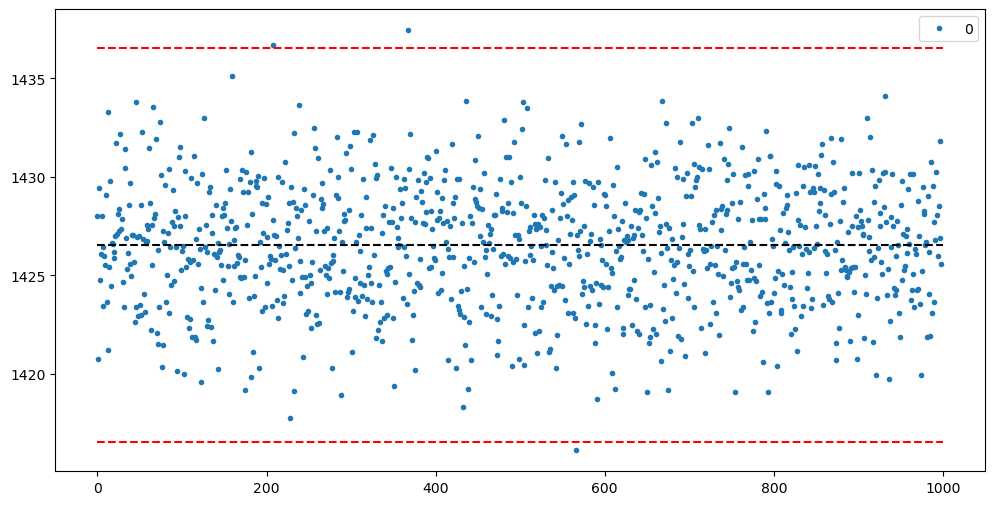

In [55]:
tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax=ax

# 5. Teste paramétricos

## 5.1 Teste bicaudal

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

### Dados

In [56]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [57]:
media_amostra = amostra.mean()[0]
desvio_padrao_amostra = amostra.std()[0]
print(f'Média amostra: {media_amostra:.2f}')
print(f'Desvio padrão: {desvio_padrao_amostra:.2f}')

Média amostra: 503.24
Desvio padrão: 4.48


In [58]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

#### H0 → Média da amostra é igual a 500
#### H1 → Média a amostra não é igual a 500

* O tamanho da amostra é maior que 30
* O desvio padrão populacional não é conhecido

### Obtendo $z_{\alpha/2}$

In [59]:
probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

### Obtendo aa estatística teste

In [60]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

5.109559775991877

### Aceitar ou rejeitar a hipótese nula

In [61]:
if (z <= -z_alpha_2) or (z >= z_alpha_2):
    print('Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.')
else:
    print('Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a média da amostra é igual a 500 ml.')

Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.


### P valor

In [62]:
p_valor = 2 * (1 - norm.cdf(z))
if p_valor <= significancia:
    print('Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.')
else:
    print('Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a média da amostra é igual a 500 ml.')

Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.


### ztest

In [63]:
from statsmodels.stats.weightstats import ztest

In [64]:
x, p_valor = ztest(x1 = amostra, value = media)
if p_valor <= significancia:
    print('Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.')
else:
    print('Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a média da amostra é igual a 500 ml.')

Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.


### DescrStatsW

In [65]:
from statsmodels.stats.weightstats import DescrStatsW

In [66]:
z, p_valor = DescrStatsW(amostra).ztest_mean(value = media)
if p_valor <= significancia:
    print('Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.')
else:
    print('Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a média da amostra é igual a 500 ml.')

Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra não é igual a 500 ml.


Nesse caso, o maquinário deve ser ajustado para se adequar a demanda da empresa

## 5.2 Teste unicaudal

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

### Tabela T student

In [67]:
tabela_t_student = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student.head()

Bicaudal                         0.100     0.090     0.080     0.070  \
Unicaudal                        0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 1  6.313752  7.026366  7.915815  9.057887   
                           2  2.919986  3.103977  3.319764  3.578247   
                           3  2.353363  2.470807  2.605427  2.762599   
                           4  2.131847    2.2261  2.332873  2.455892   
                           5  2.015048  2.097837  2.190958  2.297392   

Bicaudal                          0.060      0.050      0.040      0.030  \
Unicaudal                         0.030      0.025      0.020      0.015   
Graus de Liberdade (n - 1) 1  10.578895  12.706205  15.894545  21.204949   
                           2   3.896425   4.302653   4.848732   5.642778   
                           3    2.95051   3.182446   3.481909   3.896046   
                           4   2.600762   2.776445   2.998528    3.29763   
                           5   2.421585   2.570582   2.756509   3.002875   

Bicaudal                          0.020      0.010  
Unicaudal                         0.010      0.005  
Graus de Liberdade (n - 1) 1  31.820516  63.656741  
                           2   6.964557   9.924843  
                           3   4.540703   5.840909  
                           4   3.746947   4.604095  
                           5    3.36493   4.032143

### Dados

In [68]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49


In [69]:
media_amostra = amostra.mean()[0]
desvio_padrao_amostra = amostra.std()[0]
print(f'Média amostra: {media_amostra:.2f}')
print(f'Desvio padrão: {desvio_padrao_amostra:.2f}')

Média amostra: 36.25
Desvio padrão: 0.97


In [70]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1

#### H0 → Média é menor ou igual 37g
#### H1 → Média é maior que 37g

* O tamanho da amostra é menor do que 30
* A população se distribui aproximadamente como uma normal
* O desvio padrão populacional é desconhecido

In [71]:
tabela_t_student[22:25]

Bicaudal                          0.100     0.090     0.080     0.070  \
Unicaudal                         0.050     0.045     0.040     0.035   
Graus de Liberdade (n - 1) 23  1.713872  1.769907  1.831567  1.900307   
                           24  1.710882  1.766675  1.828051  1.896457   
                           25  1.708141  1.763711  1.824828  1.892928   

Bicaudal                          0.060     0.050     0.040     0.030  \
Unicaudal                         0.030     0.025     0.020     0.015   
Graus de Liberdade (n - 1) 23  1.978249  2.068658  2.176958  2.313231   
                           24  1.973994  2.063899  2.171545  2.306913   
                           25  1.970095  2.059539  2.166587   2.30113   

Bicaudal                          0.020     0.010  
Unicaudal                         0.010     0.005  
Graus de Liberdade (n - 1) 23  2.499867  2.807336  
                           24  2.492159   2.79694  
                           25  2.485107  2.787436

#### Obtendo $t_{\alpha}$

In [72]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

#### Obtendo estatística teste

In [73]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

-3.876893119952045

#### Aceitar ou rejeitar a hipótese nula

In [74]:
if t >= t_alpha:
    print('Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média da amostra é maior que 37g.')
else:
    print('Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a média da amostra é no máximo 37g.')

Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a média da amostra é no máximo 37g.


A afirmação do fabricante é, portanto, verdadeira.

## 6. Teste não paramétrico

## 6.1 Teste do Qui-Quadrado ( $\chi^2$)

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

### Tabela ($\chi^2$)

In [75]:
tabela_t_chi_2 = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.975, 0.95, 0.99, 0.995]
)

for index in tabela_t_chi_2.index:
    for column in tabela_t_chi_2.columns:
        tabela_t_chi_2.loc[index, column] = "{0:0.4f}".format(chi.ppf(float(column), index)**2)

tabela_t_chi_2.index.name='Graus de Liberdade'
tabela_t_chi_2.rename_axis(['p'], axis=1, inplace = True)

tabela_t_chi_2.head()

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382
4,0.2070,0.2971,0.4844,0.7107,1.0636,1.9226,3.3567,5.3853,7.7794,11.1433,9.4877,13.2767,14.8603
5,0.4117,0.5543,0.8312,1.1455,1.6103,2.6746,4.3515,6.6257,9.2364,12.8325,11.0705,15.0863,16.7496


### Dados

In [76]:
F_Observada = [17, 33]
F_Esperada = [25, 25]
significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1

#### H0 → Frequência "cara" é igual a frequência "coroa".
#### H1 → Frequência "cara" não é igual a frequência "coroa".

In [77]:
tabela_t_chi_2[:3]

p,0.005,0.010,0.025,0.050,0.100,0.250,0.500,0.750,0.900,0.975,0.950,0.990,0.995
Graus de Liberdade,,,,,,,,,,,,,
1,0.0000,0.0002,0.0010,0.0039,0.0158,0.1015,0.4549,1.3233,2.7055,5.0239,3.8415,6.6349,7.8794
2,0.0100,0.0201,0.0506,0.1026,0.2107,0.5754,1.3863,2.7726,4.6052,7.3778,5.9915,9.2103,10.5966
3,0.0717,0.1148,0.2158,0.3518,0.5844,1.2125,2.3660,4.1083,6.2514,9.3484,7.8147,11.3449,12.8382


#### Obtendo $\chi_{\alpha}^2$

In [78]:
chi_2_alpha = chi.ppf(confianca, graus_de_liberdade) ** 2
chi_2_alpha

3.8414588206941245

#### Obtendo estatística teste

In [79]:
chi_2 = 0
for i in range(k):
  chi_2 += (F_Observada[i] - F_Esperada[i]) ** 2 /  F_Esperada[i]
  
chi_2

5.12

#### Aceitar ou rejeitar hipótese nula

In [80]:
if chi_2 > chi_2_alpha:
    print('Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a frequência "cara" não é igual a frequência "coroa".')
else:
    print('Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a frequência "cara" é igual a frequência "coroa".')

Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a frequência "cara" não é igual a frequência "coroa".


Conclui-se que as distribuições são discrepantes, logo a moeda não é honesta

## 6.2 Teste Wilcoxon

Uma empresa farmaceutica, deseja definir se o tratamento disponibilizado por eles contra o tabaco, está sendo efetivo ou não. Duas amostras são disponibilizadas, uma referente a quantidade cigarros consumidos pelos pacientes antes do tratamento, e a outra, após o tratamento.

### Dados

In [81]:
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
significancia = 0.05
confianca = 1 - significancia
n = 35

In [82]:
fumo = pd.DataFrame(fumo)
fumo.head()

,Antes,Depois
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


#### H0 → Média de cigarro consumidos antes do tratamento é igual a média de cigarros consumidos depois
#### H1 → Média de cigarro consumidos antes do tratamento é maior que a média de cigarros consumidos depois

* Tamanho da amostra é maior que 20

#### Obtendo $z_{\alpha/2}$

In [83]:
probabilidade = (0.5 + (confianca / 2))
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2.round(2)

1.96

In [84]:
T, p_valor = wilcoxon(fumo.Antes, fumo.Depois)
if p_valor <= significancia:
    print('Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média de cigarros consumidos antes é maior em relação a depois do tratamento.')
else:
    print('Com nível de confiança de 95%, a hipótese nula deve ser aceita, logo a média de cigarros consumidos antes é igual em relação a depois do tratamento.')

Com nível de confiança de 95%, a hipótese nula deve ser rejeitada, logo a média de cigarros consumidos antes é maior em relação a depois do tratamento.


In [85]:
media_antes = fumo.Antes.mean()
media_depois = fumo.Depois.mean()
print(f'A média de cigarros consumidos antes do tratamento é: {media_antes:.2f}')
print(f'A média de cigarros consumidos depois do tratamento é: {media_depois:.2f}')

A média de cigarros consumidos antes do tratamento é: 31.86
A média de cigarros consumidos depois do tratamento é: 11.20


O tratamento realizado é efetivo, visto que a média de cigarros consumidos após o tratamento é quase um terço da média anterior ao tratamento. Ou seja, o tratamento diminui o consumo de cigarro em 3 vezes, aproxidamente.

# 7. Exemplo

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

### Seleção das amostras

In [86]:
rj = dados.query('UF == 33').sample(n=500, random_state=101).Renda
sp = dados.query('UF == 35').sample(n=500, random_state=101).Renda

### Dados

In [87]:
media_amostra_rj = rj.mean()
desvio_padrao_amostra_rj = rj.std()
media_amostra_sp = sp.mean()
desvio_padrao_amostra_sp = sp.std()
print(f'A média da amostra referente ao estado do Rio de Janeiro é: {media_amostra_rj:.2f}')
print(f'O desvio padrão da amostra referente ao estado do Rio de Janeiro é: {desvio_padrao_amostra_rj:.2f}')
print(f'A média da amostra referente ao estado de São Paulo é: {media_amostra_sp:.2f}')
print(f'O desvio padrão da amostra referente ao estado de São Paulo é: {desvio_padrao_amostra_sp:.2f}')

A média da amostra referente ao estado do Rio de Janeiro é: 2240.52
O desvio padrão da amostra referente ao estado do Rio de Janeiro é: 4643.84
A média da amostra referente ao estado de São Paulo é: 2839.35
O desvio padrão da amostra referente ao estado de São Paulo é: 3699.38


In [88]:
significancia = 0.05
confianca = 1 - significancia
n_rj = 500
n_sp = 500
D_0 = 0

#### H0 → Rendimento médio no Rio de Janeiro é maior ou igual ao rendimento médio de São Paulo
#### H1 → Rendimento médio no Rio de Janeiro é menor que o rendimento médio de São Paulo

* Tamanho da amostra é maior que 30;
* A população não se distribui como uma normal;
* O desvio padrão populacional não é conhecido.

#### Obtendo $z_{\alpha}$

In [89]:
probabilidade = significancia
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

-1.64

#### Obtendo a estatística teste

In [90]:
numerador = (media_amostra_rj - media_amostra_sp) - D_0
denominador = np.sqrt((desvio_padrao_amostra_rj ** 2 / n_rj) + (desvio_padrao_amostra_sp ** 2 / n_sp))
z = numerador / denominador
z

-2.255318273608561

#### Aceitar ou rejeitar a hipótese nula

In [91]:
if z <= z_alpha:
    print('Com nível de confiança de 95%, a hipótese nula é rejeitada, logo o rendimento médio do estado do Rio de Janeiro é menor que a renda média do estado de São Paulo')
else:
    print('Com nível de confiança de 95%, a hipótese nula é aceita, logo o rendimento médio do estado do Rio de Janeiro é maior ou igual ao estado de São Paulo')

Com nível de confiança de 95%, a hipótese nula é rejeitada, logo o rendimento médio do estado do Rio de Janeiro é menor que a renda média do estado de São Paulo
